<a href="https://colab.research.google.com/github/duytan118/AI/blob/BTVN/Vietnamese_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Nhận diện những món ăn Việt Nam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Food/


/content/drive/MyDrive/Colab Notebooks/BTVN/Food


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3008 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 360 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
94/94 [==============================] - 1932s 20s/step - loss: 2.4163 - accuracy: 0.1865 - val_loss: 2.0308 - val_accuracy: 0.2389
Epoch 2/100
94/94 [==============================] - 71s 762ms/step - loss: 1.9305 - accuracy: 0.3235 - val_loss: 1.6938 - val_accuracy: 0.4417
Epoch 3/100
94/94 [==============================] - 75s 801ms/step - loss: 1.6348 - accuracy: 0.4325 - val_loss: 1.5403 - val_accuracy: 0.4750
Epoch 4/100
94/94 [==============================] - 71s 757ms/step - loss: 1.4285 - accuracy: 0.5236 - val_loss: 1.3205 - val_accuracy: 0.5583
Epoch 5/100
94/94 [==============================] - 71s 760ms/step - loss: 1.2914 - accuracy: 0.5608 - val_loss: 1.1997 - val_accuracy: 0.6000
Epoch 6/100
94/94 [==============================] - 71s 756ms/step - loss: 1.1806 - accuracy: 0.6130 - val_loss: 1.0706 - val_accuracy: 0.6250
Epoch 7/100
94/94 [==============================] - 75s 801ms/step - loss: 1.0328 - accuracy: 0.6543 - val_loss: 1.0288 - val_accuracy:

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.054134245961904526
Train Accuracy 0.9823803305625916


<function matplotlib.pyplot.show(close=None, block=None)>

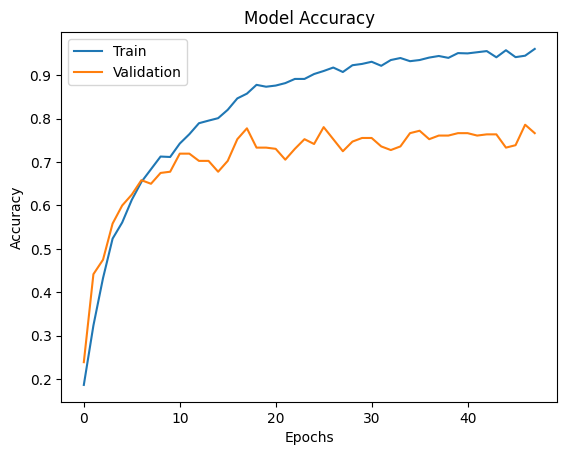

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Food.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('Food.h5')

1/1 [==============================] - 0s 364ms/step
BANH CUON


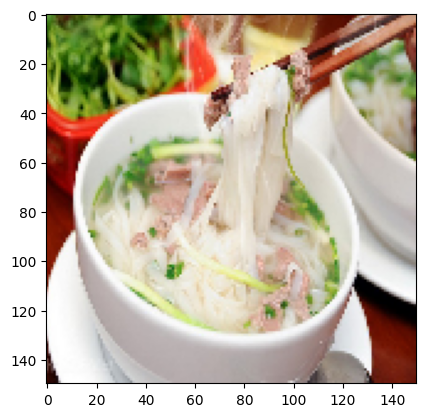

1/1 [==============================] - 0s 22ms/step
BUN DAU MAM TOM


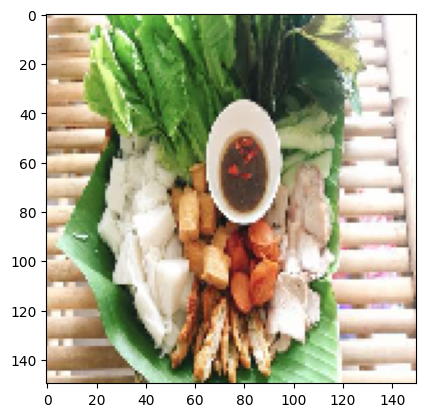

1/1 [==============================] - 0s 20ms/step
PHO


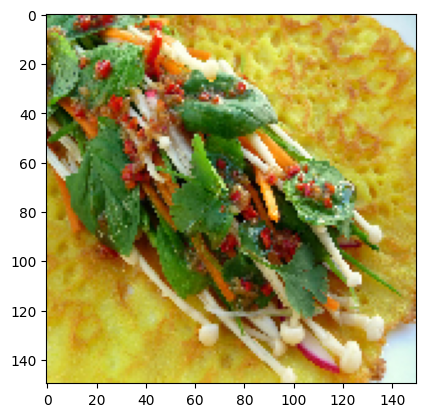

1/1 [==============================] - 0s 19ms/step
COM TAM


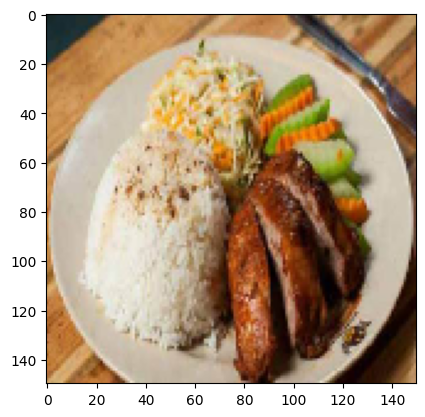

1/1 [==============================] - 0s 21ms/step
BANH CUON


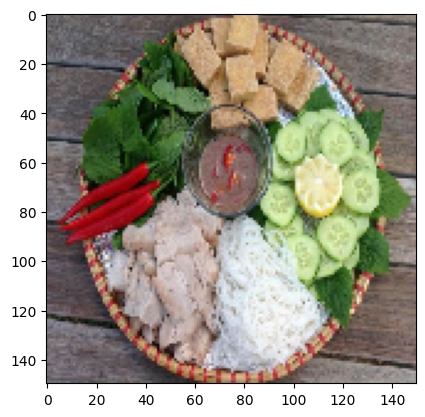

1/1 [==============================] - 0s 18ms/step
PHO


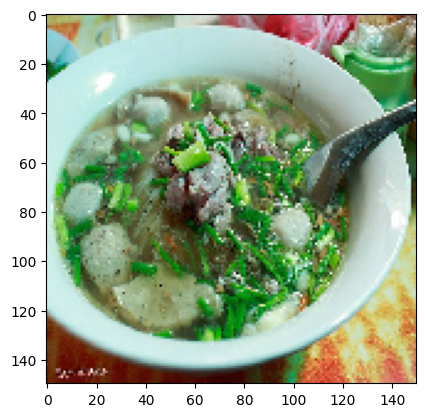

1/1 [==============================] - 0s 18ms/step
COM TAM


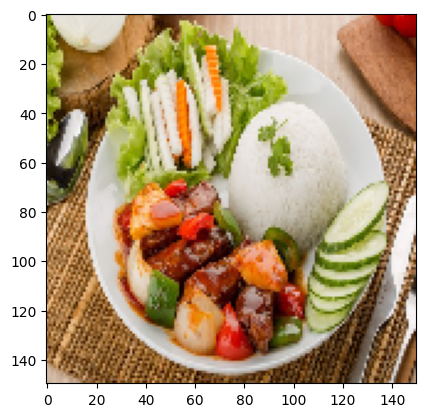

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Test/Test1"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BANH CUON'
  if round(result[0][1])==1:
    prediction='BANH MI'
  if round(result[0][2])==1:
    prediction='BANH PIA'
  if round(result[0][3])==1:
    prediction='BANH TET'
  if round(result[0][4])==1:
    prediction='BANH XEO'
  if round(result[0][5])==1:
    prediction='BUN DAU MAM TOM'
  if round(result[0][6])==1:
    prediction='CA KHO TO'
  if round(result[0][7])==1:
    prediction='COM TAM'
  if round(result[0][8])==1:
    prediction='NEM'
  if round(result[0][9])==1:
    prediction='PHO'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 38ms/step
BANH TET


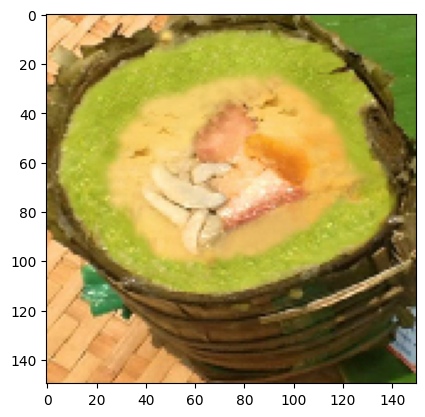

1/1 [==============================] - 0s 21ms/step
CA KHO TO


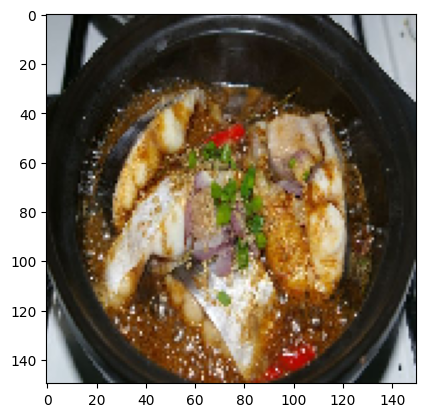

1/1 [==============================] - 0s 20ms/step
BANH PIA


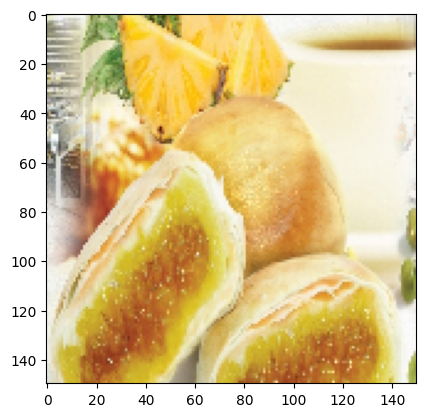

1/1 [==============================] - 0s 27ms/step
PHO


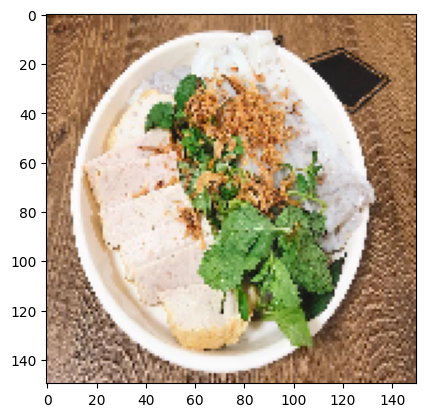

1/1 [==============================] - 0s 32ms/step
BANH MI


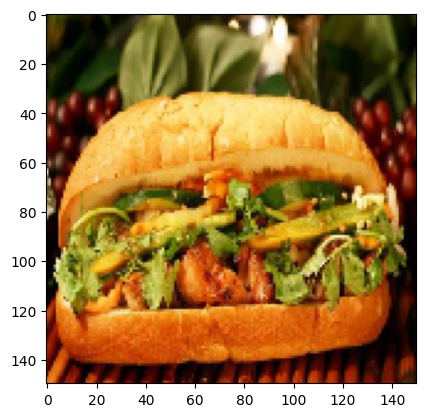

1/1 [==============================] - 0s 21ms/step
BANH XEO


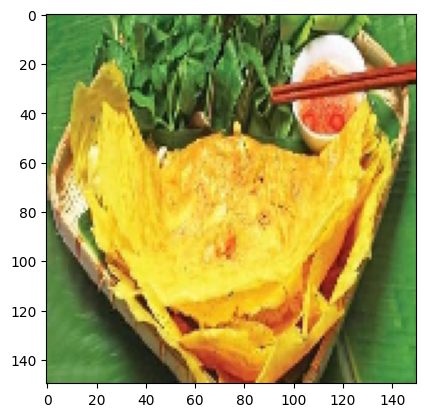

1/1 [==============================] - 0s 22ms/step
PHO


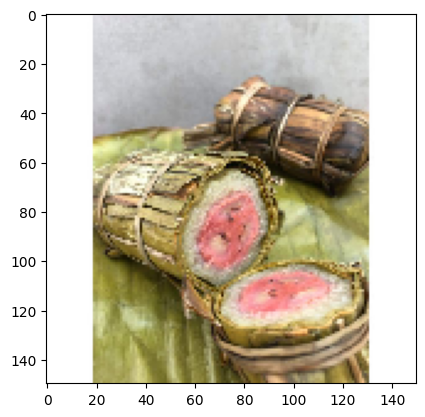

1/1 [==============================] - 0s 21ms/step
NEM


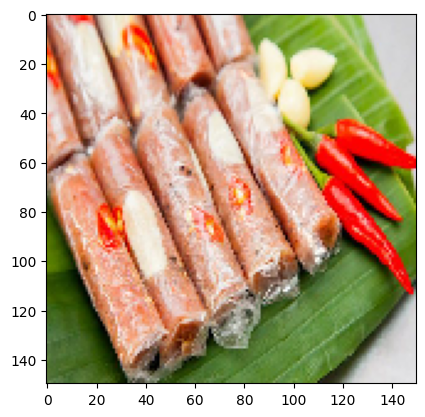

1/1 [==============================] - 0s 18ms/step
NEM


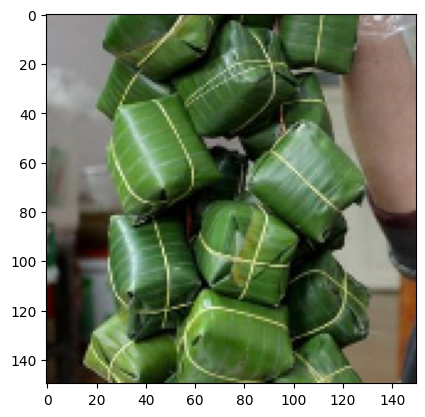

1/1 [==============================] - 0s 19ms/step
BANH PIA


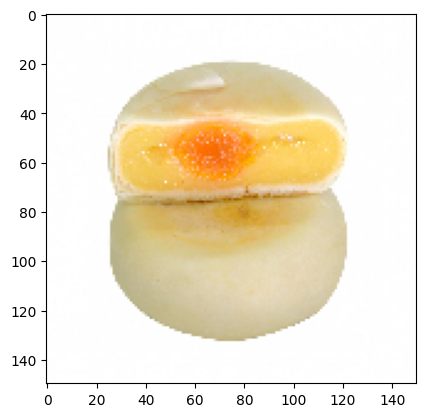

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Test/Test2"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BANH CUON'
  if round(result[0][1])==1:
    prediction='BANH MI'
  if round(result[0][2])==1:
    prediction='BANH PIA'
  if round(result[0][3])==1:
    prediction='BANH TET'
  if round(result[0][4])==1:
    prediction='BANH XEO'
  if round(result[0][5])==1:
    prediction='BUN DAU MAM TOM'
  if round(result[0][6])==1:
    prediction='CA KHO TO'
  if round(result[0][7])==1:
    prediction='COM TAM'
  if round(result[0][8])==1:
    prediction='NEM'
  if round(result[0][9])==1:
    prediction='PHO'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 21ms/step
CA KHO TO


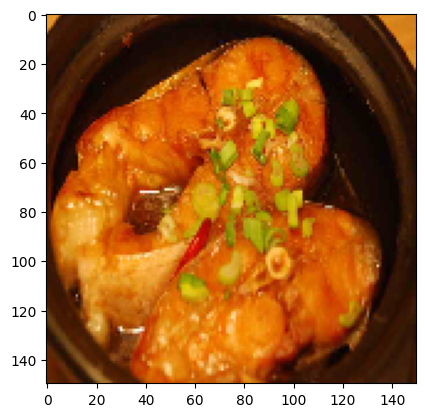

1/1 [==============================] - 0s 20ms/step
PHO


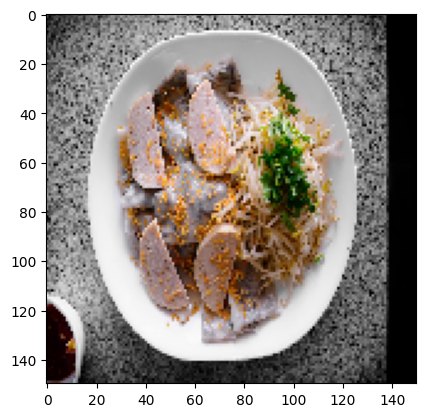

1/1 [==============================] - 0s 27ms/step
NEM


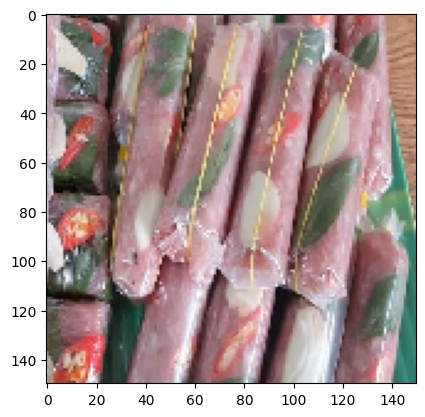

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Test/test 3"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BANH CUON'
  if round(result[0][1])==1:
    prediction='BANH MI'
  if round(result[0][2])==1:
    prediction='BANH PIA'
  if round(result[0][3])==1:
    prediction='BANH TET'
  if round(result[0][4])==1:
    prediction='BANH XEO'
  if round(result[0][5])==1:
    prediction='BUN DAU MAM TOM'
  if round(result[0][6])==1:
    prediction='CA KHO TO'
  if round(result[0][7])==1:
    prediction='COM TAM'
  if round(result[0][8])==1:
    prediction='NEM'
  if round(result[0][9])==1:
    prediction='PHO'
  print(prediction)
  plt.show()